In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV,ridge,ElasticNetCV,ElasticNetCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.Class.value_counts(normalize=True) #to get the percentage of the data

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

- v1 to v28 are the standerdized numbers given from the bank to maintain the secrecy about the data and the rest are not standerdized

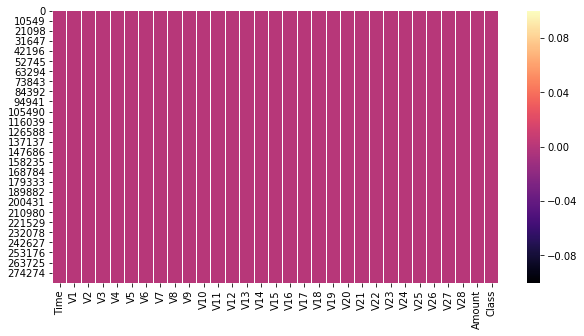

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma')
plt.show()

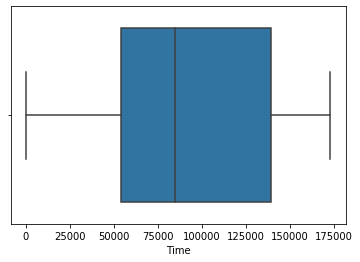

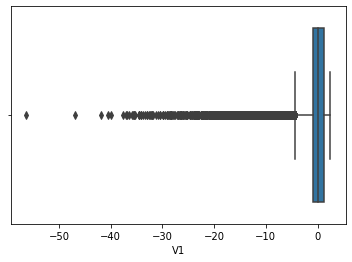

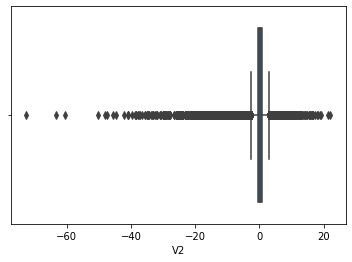

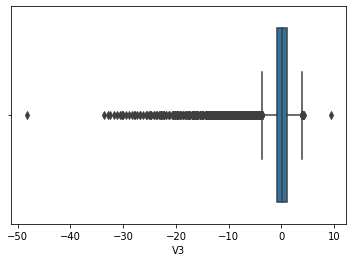

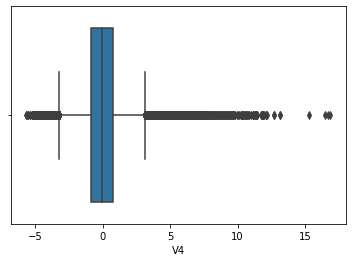

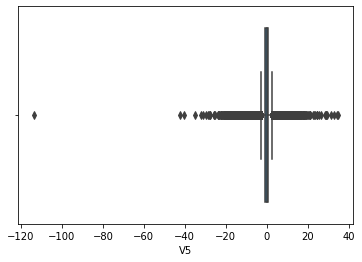

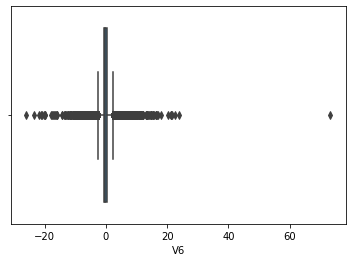

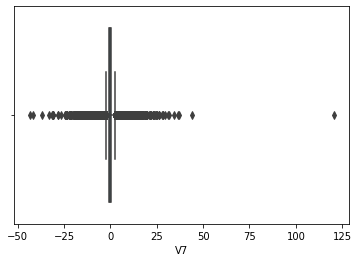

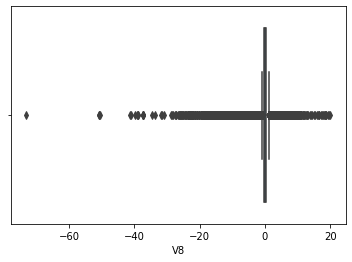

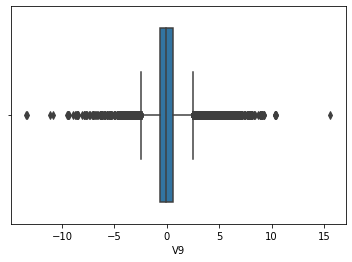

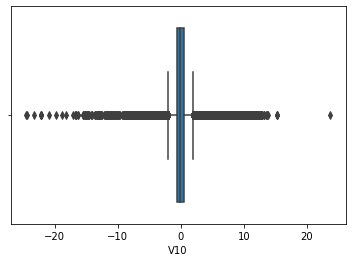

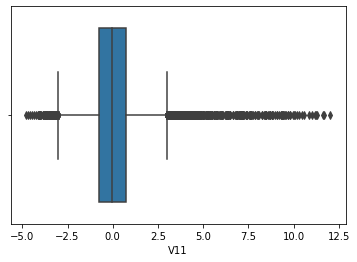

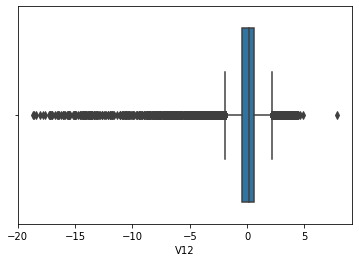

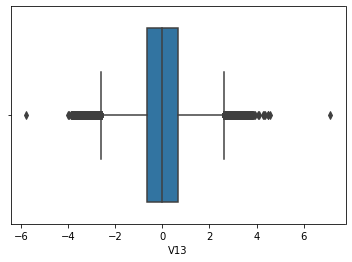

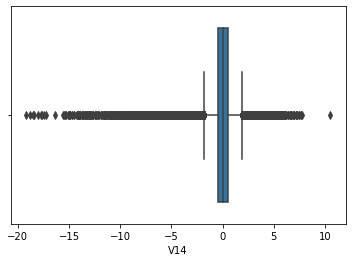

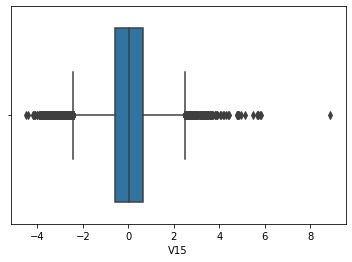

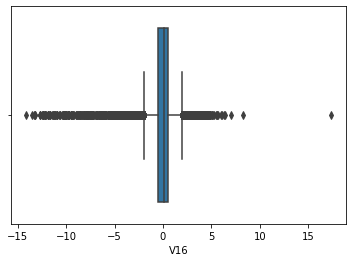

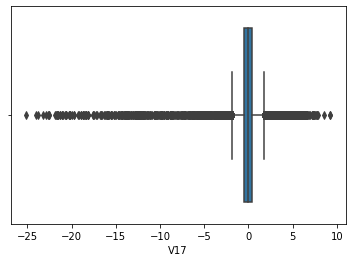

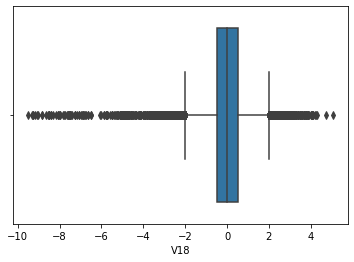

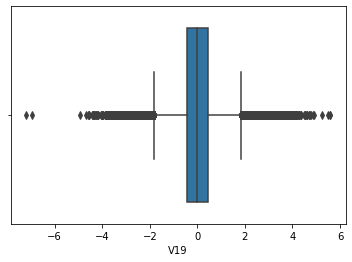

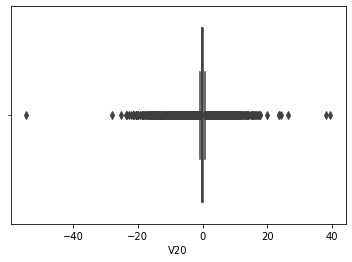

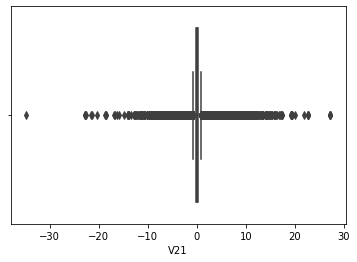

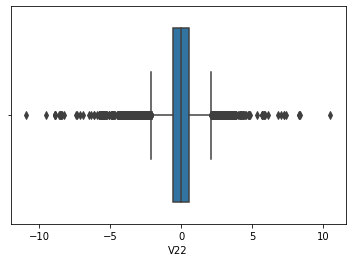

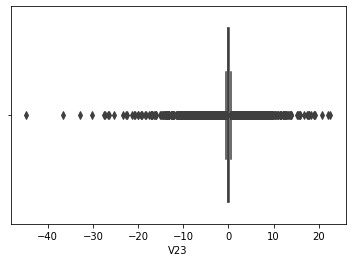

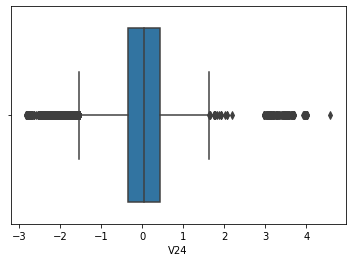

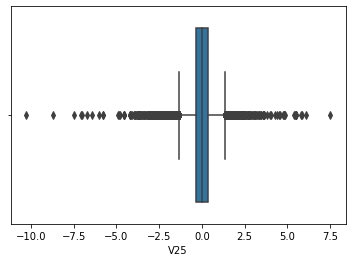

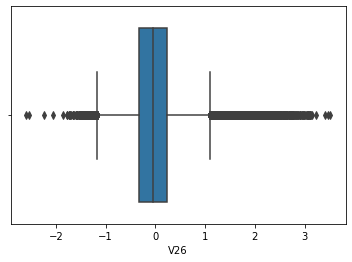

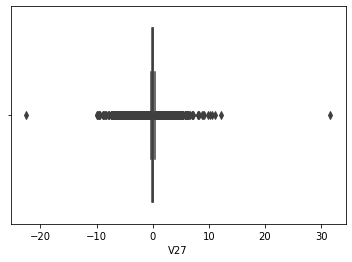

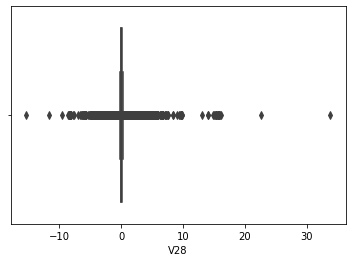

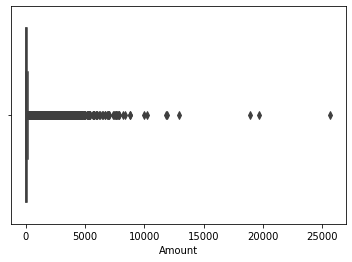

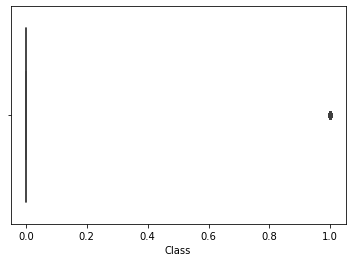

In [9]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
#removing the outliers
cols=['V1','V2','V3','V4','V5','V6','V7','V8','V9',
'V10','V12','V13','V14','V15','V16','V20','V27','V28','Amount']
df_clean=df.copy()
for i in cols:
    q1=df_clean[i].quantile(0.25)
    q3=df_clean[i].quantile(0.75)
    df_clean=df_clean[(df_clean[i]>=q1-1.5*(q3-q1))&(df_clean[i]<=q3+1.5*(q3-q1))]
    print(df_clean.shape)

(277745, 31)
(269307, 31)
(268198, 31)
(258052, 31)
(249991, 31)
(236373, 31)
(233802, 31)
(218689, 31)
(213008, 31)
(204974, 31)
(194765, 31)
(193520, 31)
(187222, 31)
(185162, 31)
(179596, 31)
(170529, 31)
(151335, 31)
(141292, 31)
(128695, 31)


In [11]:
df1=df_clean

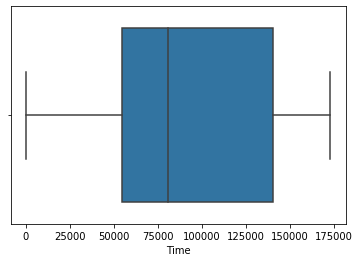

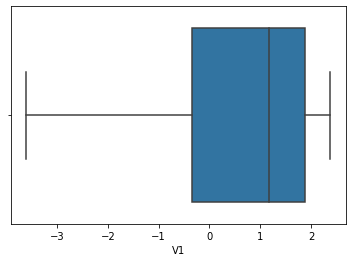

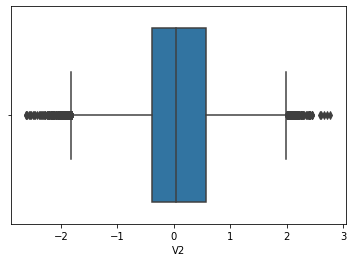

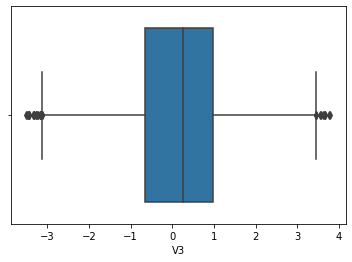

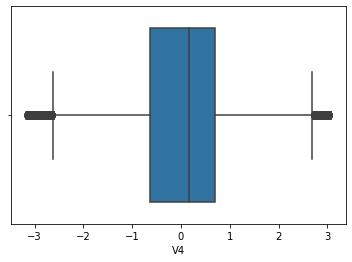

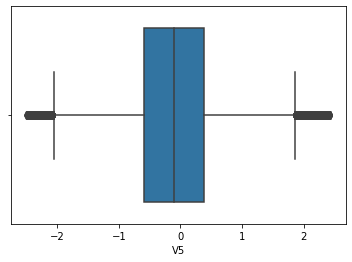

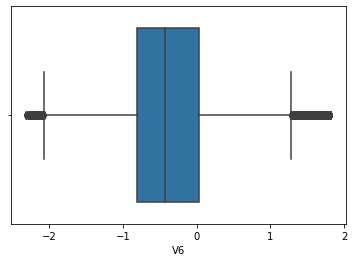

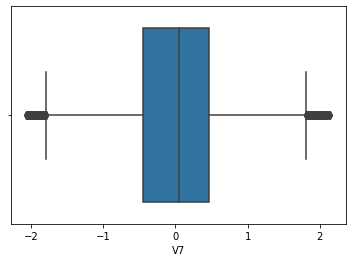

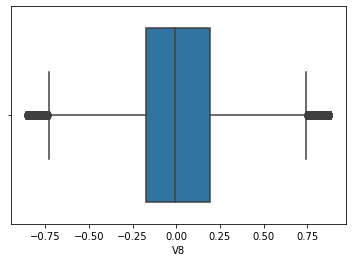

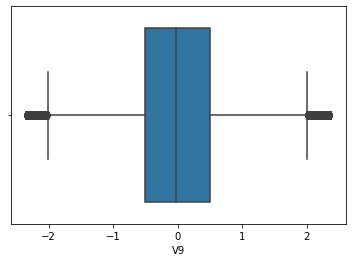

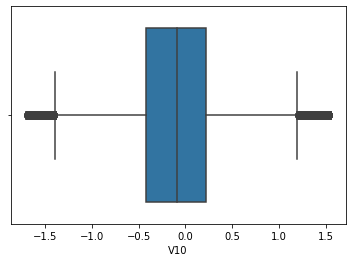

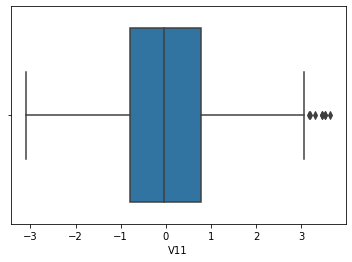

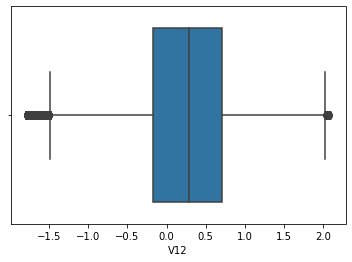

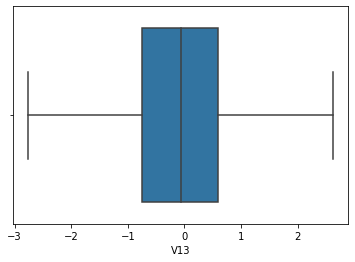

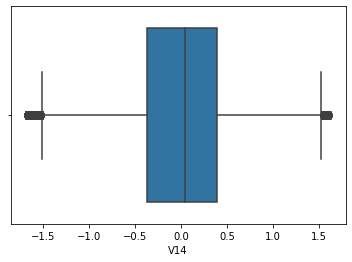

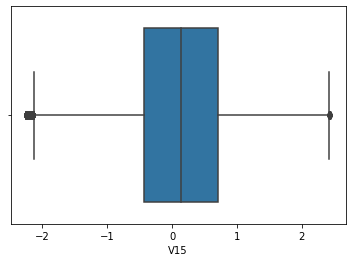

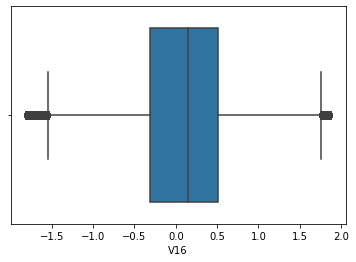

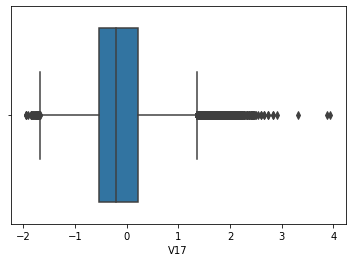

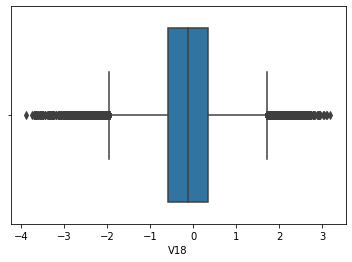

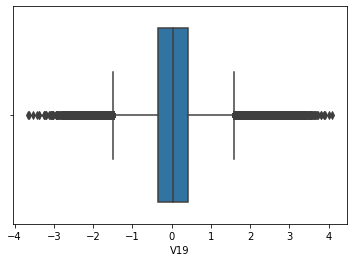

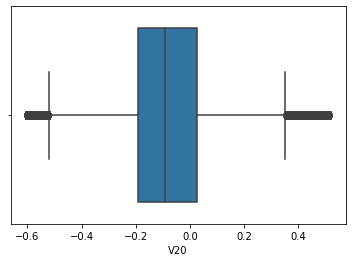

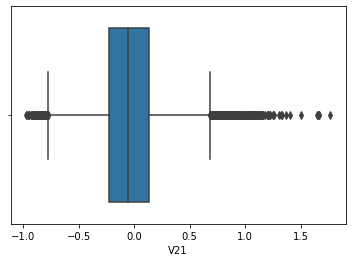

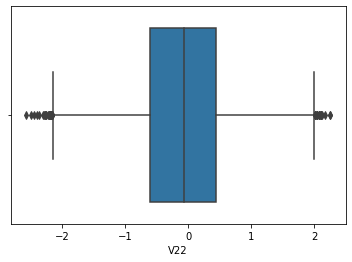

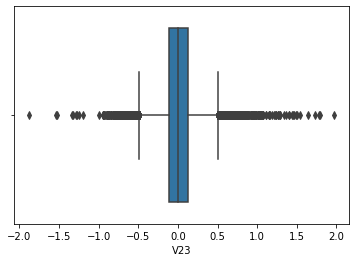

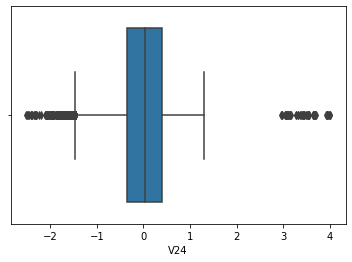

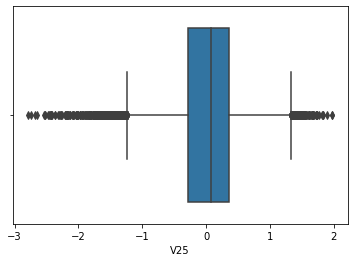

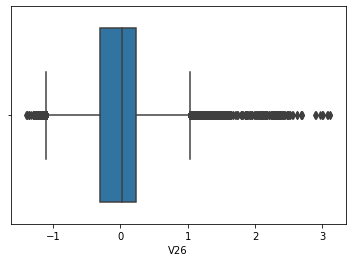

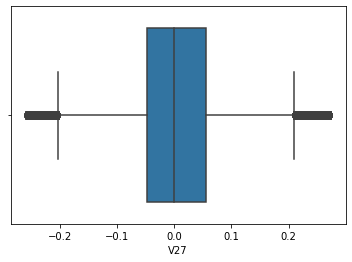

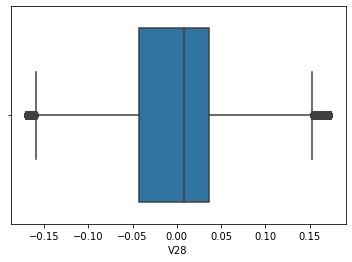

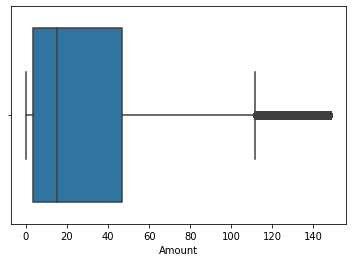

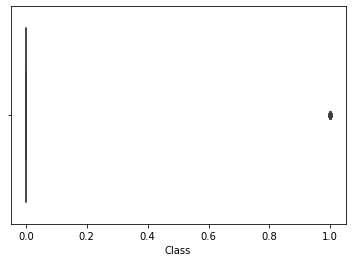

In [12]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

after removing the outliers we can see that there are no extreme outliers in the independent variables

In [13]:
df1['Class'].value_counts(normalize=True)

0    0.999876
1    0.000124
Name: Class, dtype: float64

In [14]:
#lets standerdize the amount and time
df2=df[['Amount','Time']]
df2.head()

,Amount,Time
0,149.62,0.0
1,2.69,0.0
2,378.66,1.0
3,123.50,1.0
4,69.99,2.0


In [15]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
df2=ss.fit_transform(df2)
df2=pd.DataFrame(df2,columns=['Amount','Time'])
df2.head()

,Amount,Time
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541


In [16]:
#df.drop(['Amount','Time'],1,inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df=pd.concat([df,df2],1)

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount,Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [19]:
y=df[['Class']]
x=df.drop('Class',1)
x=x.drop(['V17','V12','V14','V10','V7','V16','V11','V3','V4','V18','V2','V1',"V5",'V9','V23','V6'],1)

In [20]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
def model_compare(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_pred_train=algo.predict(xtrain)
    y_prob_train=algo.predict_proba(xtrain)[:,-1]
    
    y_pred_test=algo.predict(xtest)
    y_prob_test=algo.predict_proba(xtest)[:,-1]
    
    print("accuracy of the train set",accuracy_score(ytrain,y_pred_train))
    print("Accuracy of the test set",accuracy_score(ytest,y_pred_test))
    print("**************************************************************")
    print("AUC score on train set",roc_auc_score(ytrain,y_prob_train))
    print("AUC score on test set:",roc_auc_score(ytest,y_prob_test))
    
    fpr,tpr,thresholds=roc_curve(ytrain,y_prob_train)
    fpr1,tpr1,thresholds=roc_curve(ytest,y_prob_test)
    plt.plot(fpr,tpr,'r-')
    plt.plot(fpr1,tpr1,'g-')
    plt.plot(fpr1,fpr1)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc=RFC()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
model_compare(rfc,xtrain,xtest,ytrain,ytest)

KeyboardInterrupt: 

In [ ]:
#from scipy.stats import randint as sp_randint
#rfc=RFC(random_state=1)
#params={'n_estimators':sp_randint(5,25),
        #'max_depth':sp_randint(2,10),
       #min_samples_split':sp_randint(2,20),
       #'min_samples_leaf':sp_randint(1,20),
       #'criterion':['gini','entropy'],
       #'max_features':sp_randint(2,15)}
#rand_search_rfc=RandomizedSearchCV(rfc,param_distributions=params,cv=3,random_state=1)
#rand_search_rfc.fit(x,y)

In [ ]:
rand_search_rfc={'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 17,
 'min_samples_split': 3,
 'n_estimators': 17}

In [ ]:
rfc=RFC(**rand_search_rfc)
model_compare(rfc,xtrain,xtest,ytrain,ytest)

## Handling the imbalanced data-undersample the majority

In [ ]:
ytrain.value_counts().plot(kind='bar')
plt.show()

In [ ]:
xy_train=pd.concat([xtrain,ytrain],1)
xy_train0=xy_train.loc[xy_train['Class']==0]
xy_train1=xy_train.loc[xy_train['Class']==1]
len1=len(xy_train1)
len0=len(xy_train0)
xy_train0_us=xy_train0.sample(len1)
xy_train_us=pd.concat([xy_train0_us,xy_train1],0)
y_train_us=xy_train_us['Class']
x_train_us=xy_train_us.drop('Class',1)

- we undersampled the majority class(0) equal to the minority class(1) to get the best results,this was done only on the  train set and the test set was untouched

In [ ]:
xy_train_us['Class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
rfc=RFC(**rand_search_rfc)
model_compare(rfc,x_train_us,xtest,y_train_us,ytest)

## Handling imbalanced data-oversampling the minority class

In [ ]:
xy_train=pd.concat([xtrain,ytrain],1)
xy_train0=xy_train.loc[xy_train['Class']==0]
xy_train1=xy_train.loc[xy_train['Class']==1]
len1=len(xy_train1)
len0=len(xy_train0)
xy_train1_os=xy_train1.sample(len0,replace=True)
xy_train_os=pd.concat([xy_train1_os,xy_train0],0)
y_train_os=xy_train_os['Class']
x_train_os=xy_train_os.drop('Class',1)

In [ ]:
rfc=RFC(**rand_search_rfc)
model_compare(rfc,x_train_os,xtest,y_train_os,ytest)

## Handling imbalance data- SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote=SMOTE(sampling_strategy='minority')
smote

In [ ]:
x_train_sm,y_train_sm=smote.fit(xtrain,ytrain)


In [ ]:
model_compare(rfc,x_train_sm,xtest,y_train_sm,ytest)

## SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
svc=SVC(gamma='auto',probability=True)
svc.fit(xtrain,ytrain)
model_compare(svc,xtrain,xtest,ytrain,ytest)